# LAB | Imbalanced Classification Task

# Round 1

Import the required libraries and modules that you would need.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings('ignore')

Read that data into Python and call the dataframe churnData.

In [6]:
churnData = pd.read_csv("DATA_Customer-Churn.txt", sep = ",")
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


Check the datatypes of all the columns in the data.You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [7]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors='coerce')
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Check for null values in the dataframe. Replace the null values

In [9]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
null_data= churnData[(churnData['TotalCharges'].isnull()==True)]
null_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,Yes,No,Yes,Yes,Yes,No,Two year,52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,Yes,Yes,Yes,No,Yes,Yes,Two year,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,Yes,Yes,Yes,Yes,Yes,No,Two year,56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,Two year,73.35,NaN,No


In [12]:
churnData.loc[(churnData['TotalCharges'].isnull()==True), 'TotalCharges'] = churnData['tenure'] * churnData["MonthlyCharges"]

Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

In [13]:
churnData_num = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges", "Churn"]]
churnData_num.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,No
1,34,0,56.95,1889.50,No
2,2,0,53.85,108.15,Yes
3,45,0,42.30,1840.75,No
4,2,0,70.70,151.65,Yes


In [14]:
churnData_num['Churn'] = churnData_num['Churn'].apply(lambda x: 1 if x == "Yes" else 0)

In [15]:
churnData_num.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,0
1,34,0,56.95,1889.50,0
2,2,0,53.85,108.15,1
3,45,0,42.30,1840.75,0
4,2,0,70.70,151.65,1


In [16]:
def split_X_y(df, target_col):
    X = df.drop(target_col, axis=1) #predictive variables
    y = df[target_col] #predicted varuable

    return X, y 

X, y  = split_X_y(churnData_num, 'Churn')

In [17]:
def split_data(X, y, test_size=0.2, random_state=42): 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)

Scale the features either by using MinMaxScaler or a standard scaler.

In [18]:
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_train_scaled =pd.DataFrame(X_train_scaled, columns=X_train.columns)
    
    X_test_scaled = scaler.transform(X_test) #not building a new scaler we're fitting on the scale defined for train
    X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled

In [19]:
X_train, X_test=scale_features(X_train, X_test)

# Round2

# Fit a Knn Classifier (NOT KnnRegressor please!)model on the training data.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc

In [21]:
model_KNN = KNeighborsClassifier(n_neighbors=3,weights='uniform')
model_KNN.fit(X_train, y_train)
y_pred_test_KNN = model_KNN.predict(X_test)
y_pred_train_KNN=model_KNN.predict(X_train)

Fit a Decision Tree Classifier on the training data.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

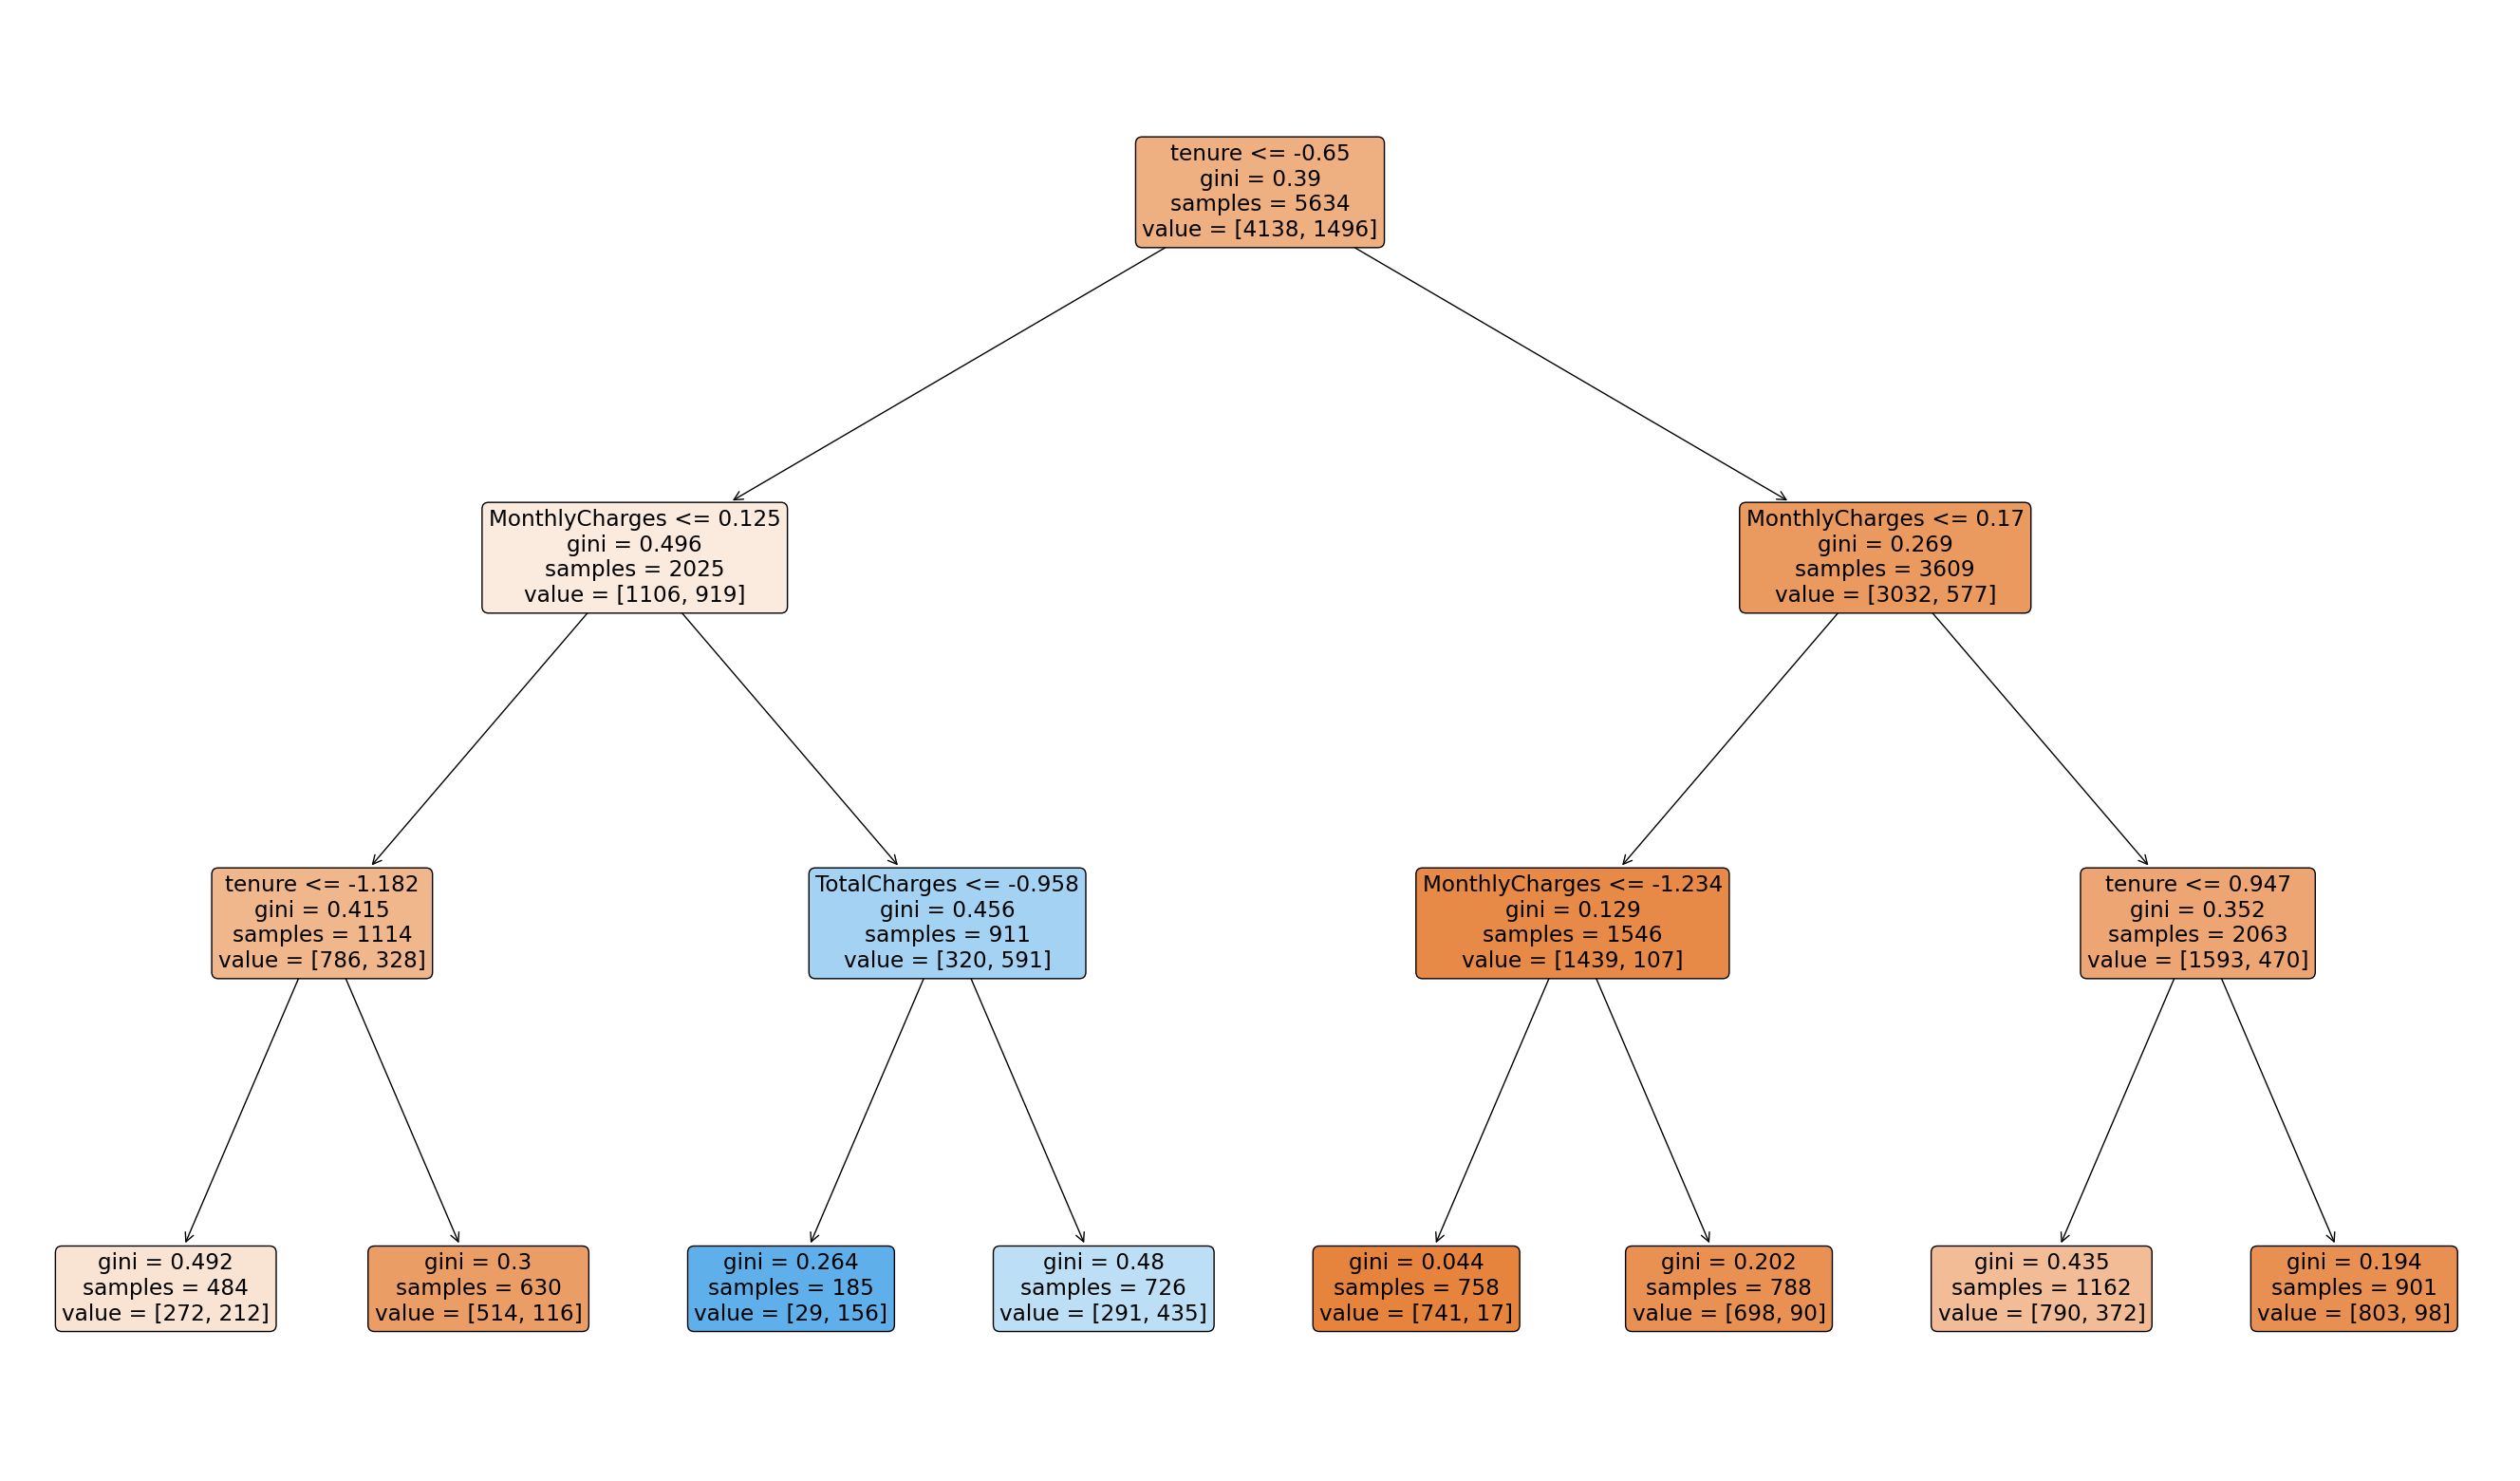

In [26]:
model_dt = DecisionTreeClassifier(max_depth=3)
model_dt.fit(X_train, y_train)

y_pred_train_dt = model_dt.predict(X_train)
y_pred_test_dt = model_dt.predict(X_test)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model_dt,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

Compare the accuracy, precision, recall for the previous models on both the train and test sets.

In [27]:
# KNN model

def evaluate_classification_model(y_train, y_pred_train_KNN, y_test, y_pred_test_KNN):
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_KNN),
                                         precision_score(y_train, y_pred_train_KNN),
                                         recall_score(y_train, y_pred_train_KNN)],
                               'Test': [accuracy_score(y_test, y_pred_test_KNN),
                                        precision_score(y_test, y_pred_test_KNN),
                                        recall_score(y_test, y_pred_test_KNN)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train_KNN})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test_KNN})

    return performance_df, df_train, df_test

error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train_KNN,y_test, y_pred_test_KNN)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.86,0.76
1,Precision,0.78,0.55
2,Recall,0.67,0.49


In [28]:
# Fit a Decision Tree Classifier on the training data

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.78,0.79
1,Precision,0.65,0.66
2,Recall,0.40,0.43


# Managing imbalance in the dataset.

Check for the imbalance.

In [29]:
# We can notice an imbalance between the churned and not churned rows 
churnData_num['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.

Downsampling

In [30]:
category_0 = churnData_num[churnData_num['Churn'] == 0] # negative class (majority)
category_1 = churnData_num[churnData_num['Churn'] == 1]

In [31]:
print('category_0 is: ', category_0.shape)
print('category_1 is: ', category_1.shape)

category_0 is:  (5174, 5)
category_1 is:  (1869, 5)


In [32]:
c1_len = 1869
category_0_down = category_0.sample(c1_len)
print(category_0_down.shape)
print(category_1.shape)

(1869, 5)
(1869, 5)


In [33]:
# Reassemble the data
down_data = pd.concat([category_0_down, category_1], axis=0)
# shuffle the data
down_data = down_data.sample(frac=1)
down_data['Churn'].value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

Text the tree model with downsampling

In [34]:
# Resplit the data

def split_X_y(df, target_col):
    X = df.drop(target_col, axis=1) #predictive variables
    y = df[target_col] #predicted varuable

    return X, y 

X, y  = split_X_y(down_data, 'Churn')

In [35]:
def split_data(X, y, test_size=0.2, random_state=42): 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)

X_train, X_test=scale_features(X_train, X_test)

In [ ]:
# Buid the desision tree

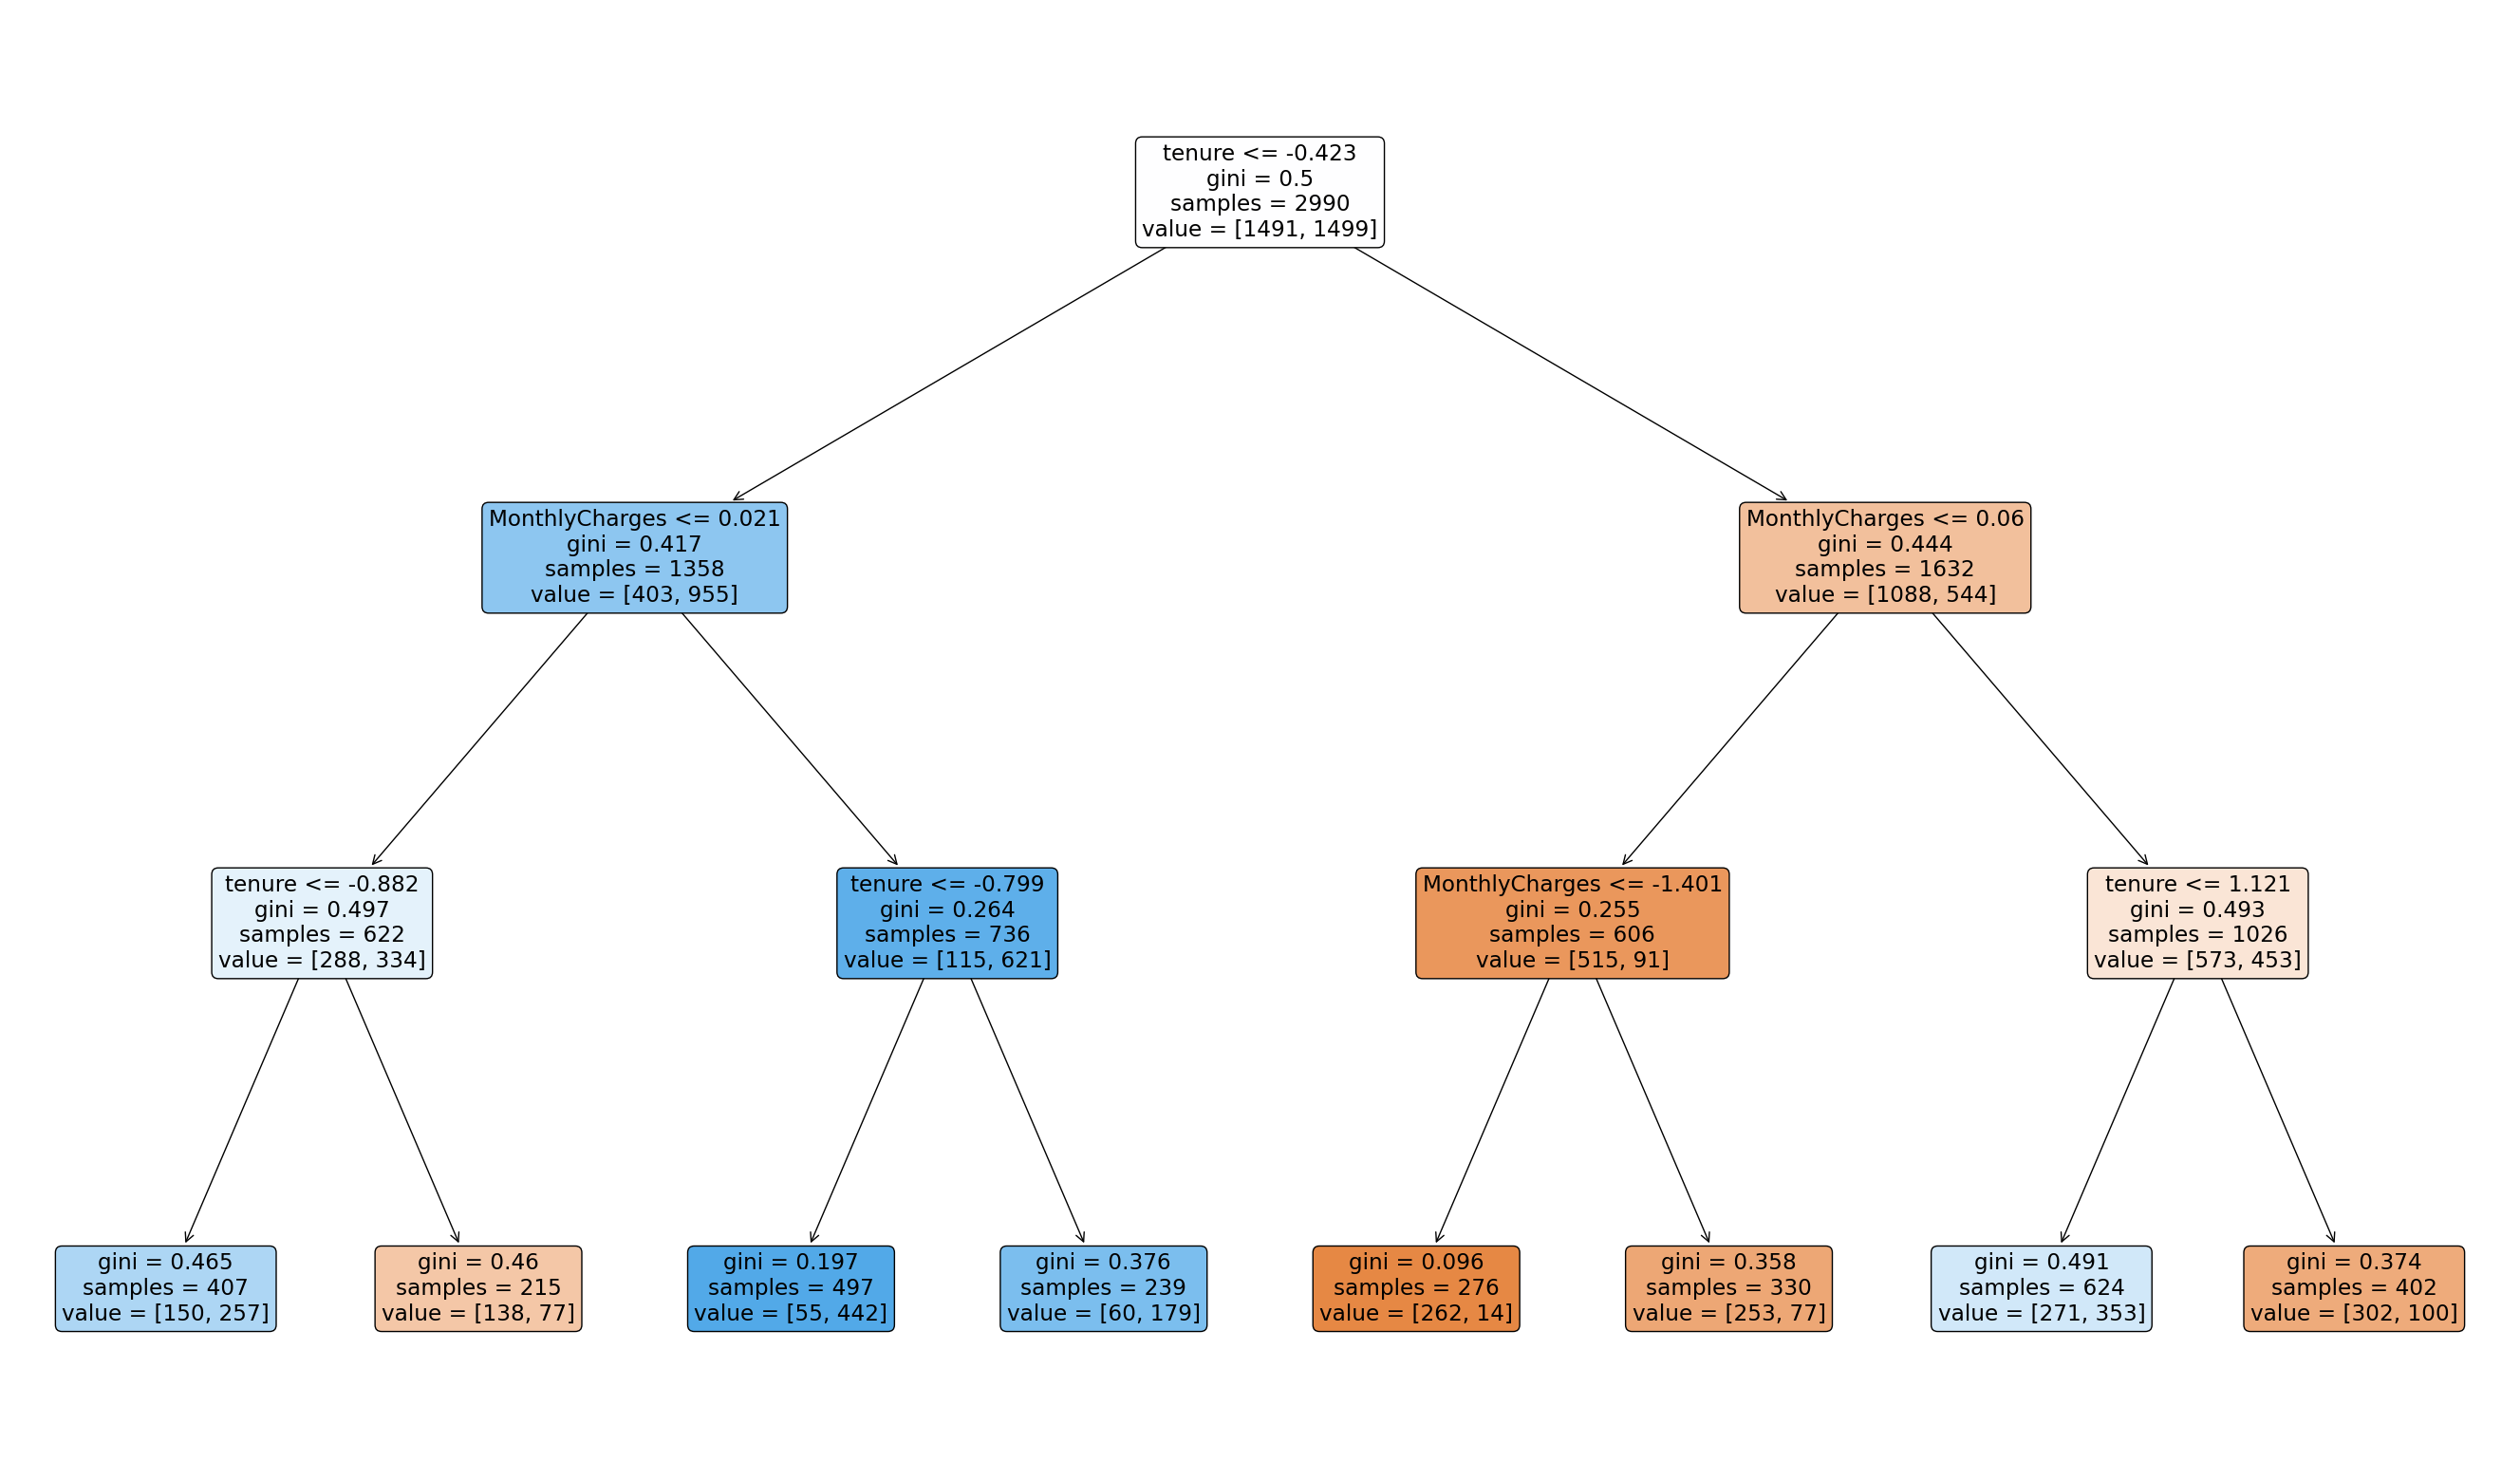

In [36]:
model_dt = DecisionTreeClassifier(max_depth=3)
model_dt.fit(X_train, y_train)

y_pred_train_dt = model_dt.predict(X_train)
y_pred_test_dt = model_dt.predict(X_test)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model_dt,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

In [37]:
performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.73,0.73
1,Precision,0.70,0.70
2,Recall,0.82,0.80


In [ ]:
# Visualy on the tree we can see that we have more balanced colors between blue and orange
# We can notice better results in error_metric values espcially for precision and recall

Upsampling

In [ ]:
# Refresh the data
category_0 = churnData_num[churnData_num['Churn'] == 0] # negative class (majority)
category_1 = churnData_num[churnData_num['Churn'] == 1]

In [38]:
c0_len = len(category_0)
c1_len = len(category_1)
c0_len,c1_len

(5174, 1869)

In [39]:
category_1_up = category_1.sample(c0_len, replace=True) # replace=True allows sampling of the same row more than once.
print(category_1_up.shape) 

(5174, 5)


In [40]:
Up_data = pd.concat([category_0, category_1_up], axis=0)

# Shuffling the data

Up_data = Up_data.sample(frac=1)
Up_data['Churn'].value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

Text the tree model with Upsampling

In [41]:
# First resplit the data

def split_X_y(df, target_col):
    X = df.drop(target_col, axis=1) #predictive variables
    y = df[target_col] #predicted varuable

    return X, y 

X, y  = split_X_y(Up_data, 'Churn')

In [42]:
def split_data(X, y, test_size=0.2, random_state=42): 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, y)

X_train, X_test=scale_features(X_train, X_test)

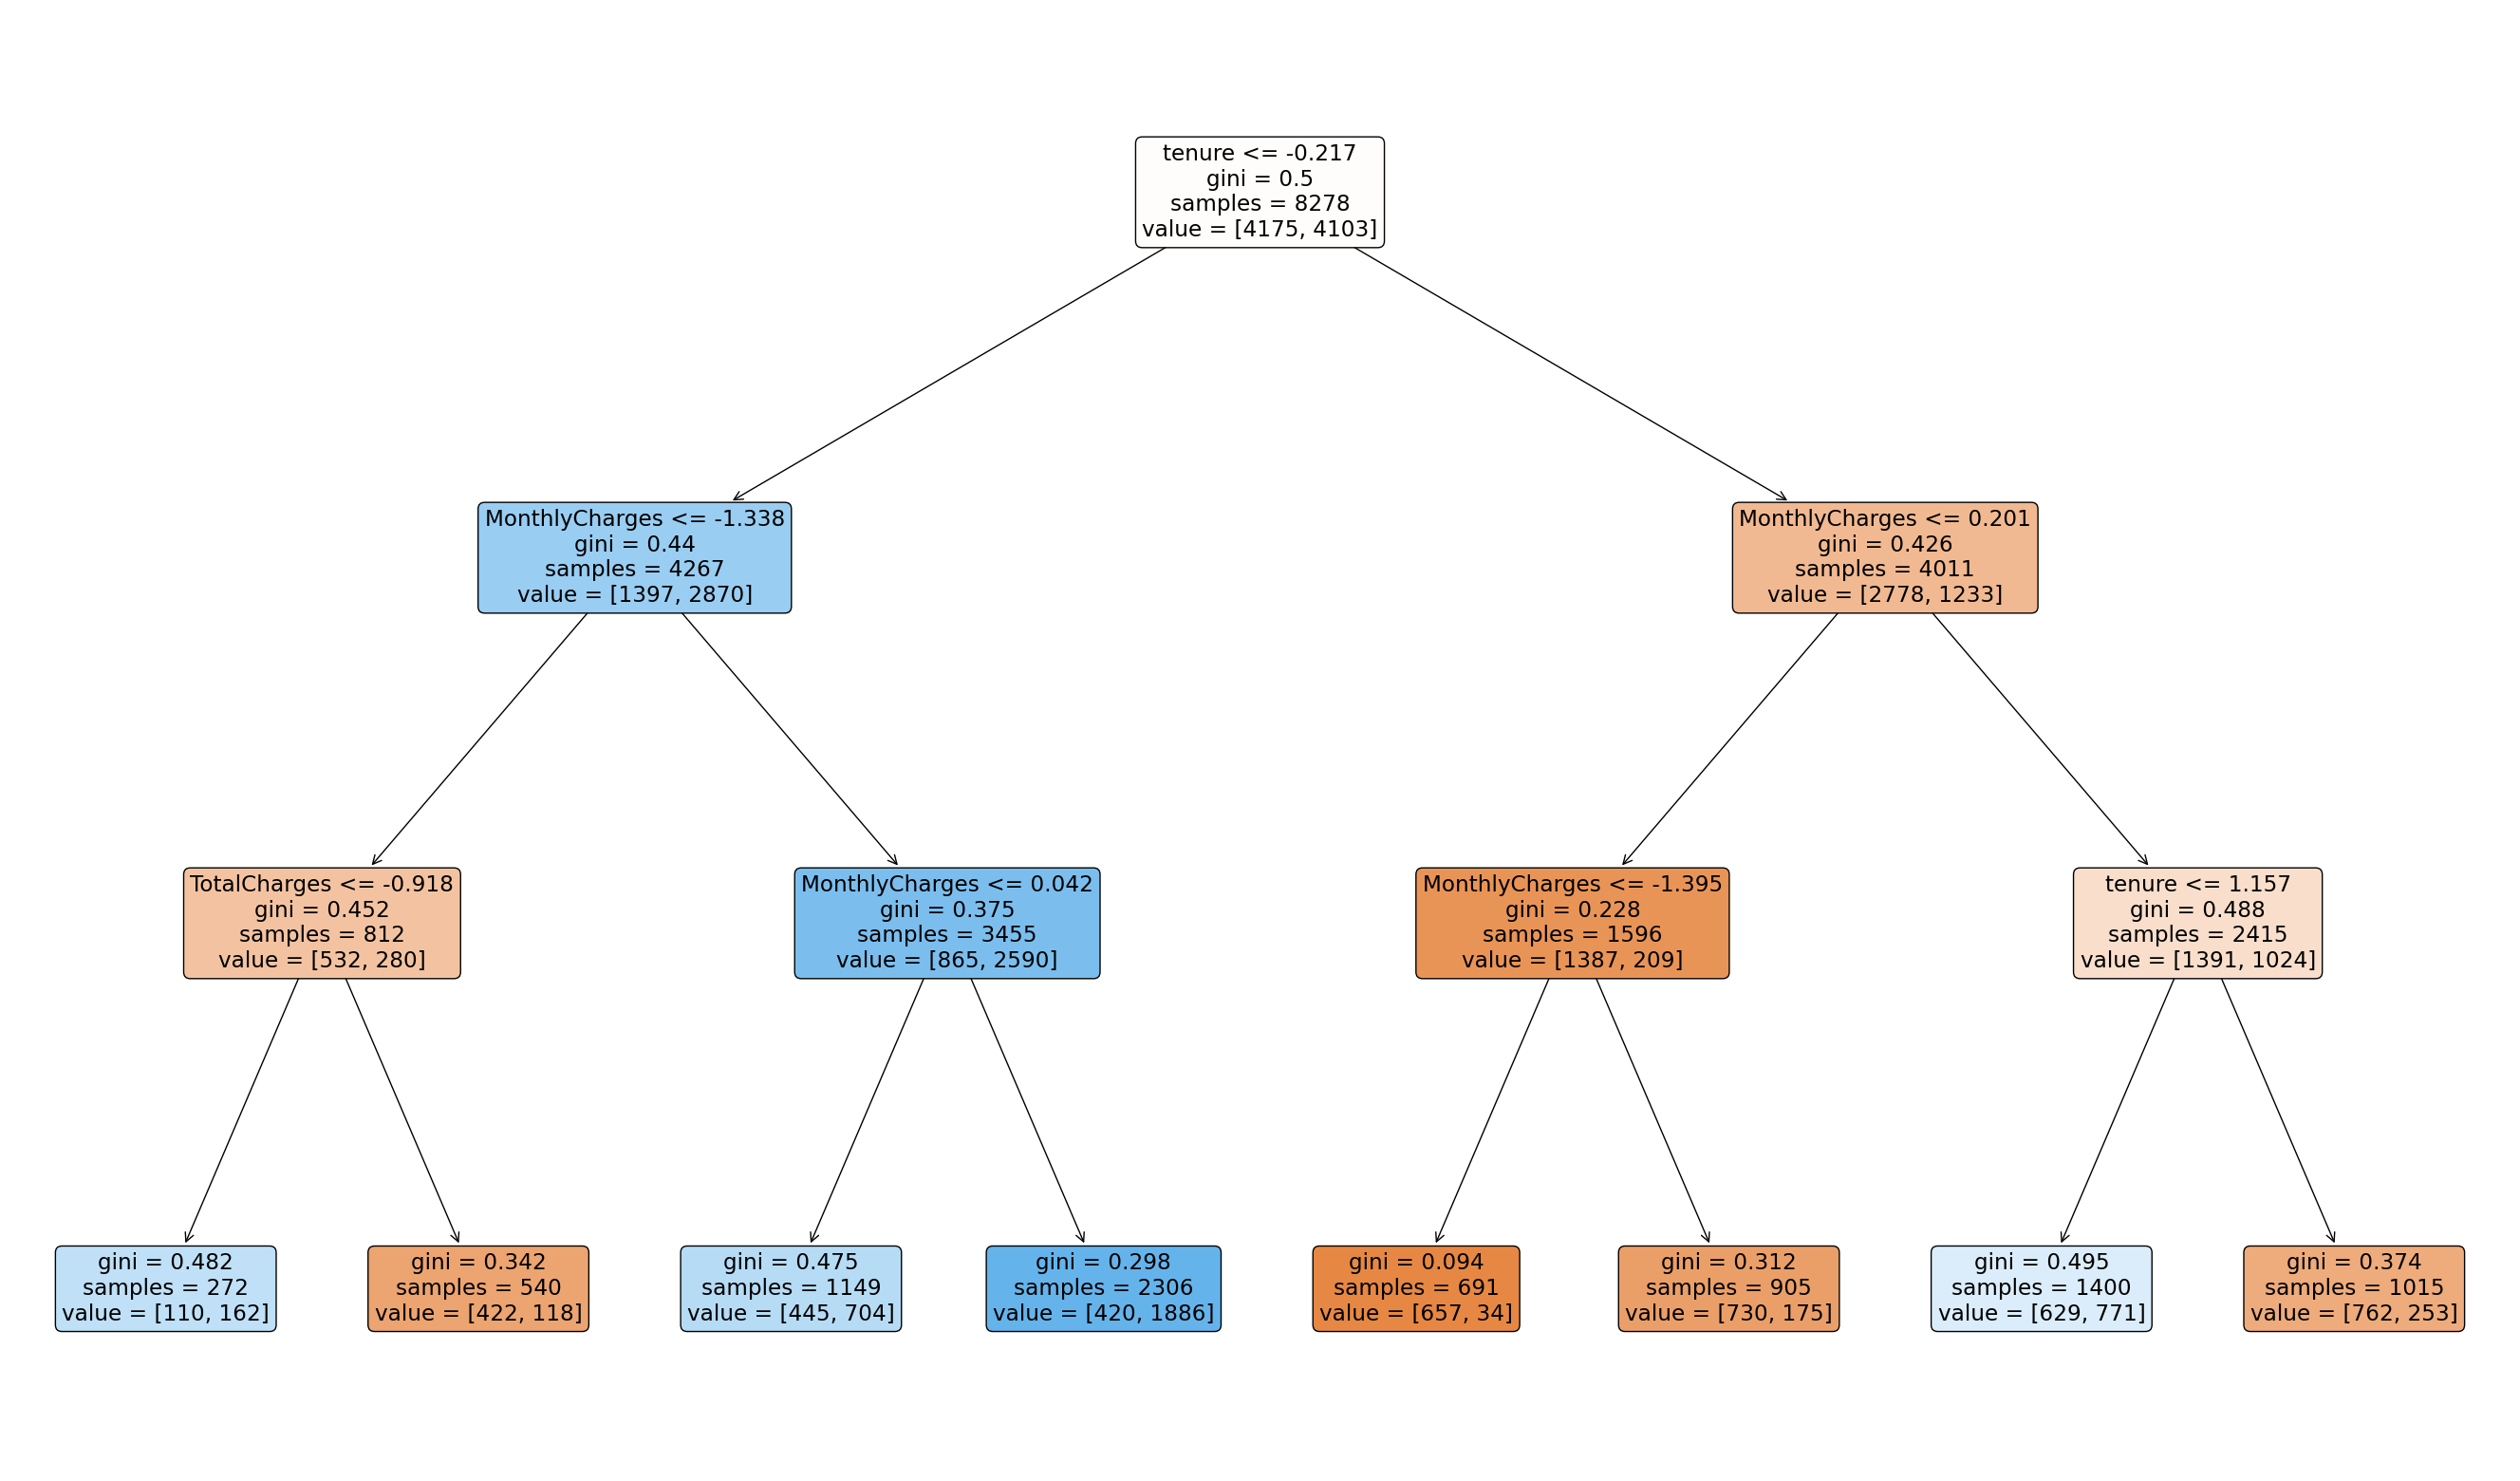

In [43]:
# Build the tree

model_dt = DecisionTreeClassifier(max_depth=3)
model_dt.fit(X_train, y_train)

y_pred_train_dt = model_dt.predict(X_train)
y_pred_test_dt = model_dt.predict(X_test)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model_dt,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

In [44]:
performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.74,0.74
1,Precision,0.69,0.71
2,Recall,0.86,0.86


In [ ]:
# We can notice visually and by looking to the error metrics: better model in this case compared to the original